# Problem Statement

You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. You need to design a system that predicts the fare amount for a cab ride in the city.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',15)
pd.set_option('display.max_rows',20000)

In [3]:
train = pd.read_csv("train_cab.csv",)
test  = pd.read_csv("test.csv")

In [4]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [6]:
print("The shape of training data is :", train.shape)
print("The shape of test data is :", test.shape)

The shape of training data is : (16067, 7)
The shape of test data is : (9914, 6)


In [7]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

Here dtype of fare_amount and pickup_datetime is object, that we have to change both

In [8]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16043 non-null  object 
 1   pickup_datetime    16067 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [11]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [12]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [13]:
train['fare_amount'] = pd.to_numeric(train['fare_amount'],errors='coerce') # It will replace all non-numeric values with NaN.

In [14]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16042 non-null  float64
 1   pickup_datetime    16067 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(6), object(1)
memory usage: 878.8+ KB


In [16]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [17]:
train['pickup_datetime'].iloc[1327] = '2012-10-21 12:45:34 UTC'

E:\Ana3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
train['pickup_datetime'].iloc[1327] 

'2012-10-21 12:45:34 UTC'

In [19]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], format = '%Y-%m-%d %H:%M:%S UTC')

In [20]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [21]:

# we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc
train['Year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [22]:
train.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51
5,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1.0,2011,1,6,3,9,50
6,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1.0,2012,11,20,1,20,35
7,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1.0,2012,1,4,2,17,22
8,NaN,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1.0,2012,12,3,0,13,10
9,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2.0,2009,9,2,2,1,11


In [23]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
Year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [24]:
test['pickup_datetime']= pd.to_datetime(test['pickup_datetime'],format= "%Y-%m-%d %H:%M:%S UTC")

In [25]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [26]:
# we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc
test['Year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date']  = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [27]:
test.head(10)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12
5,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1,2012,12,1,5,21,12
6,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1,2011,10,6,3,12,10
7,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1,2011,10,6,3,12,10
8,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1,2011,10,6,3,12,10
9,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1,2014,2,18,1,15,22


In [28]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
Year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [29]:
print(train.shape)
print(train.isnull().sum())

(16067, 13)
fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
Year                  0
Month                 0
Date                  0
Day                   0
Hour                  0
Minute                0
dtype: int64


In [30]:
train['passenger_count'].describe()

count    16012.000000
mean         2.625070
std         60.844122
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

Here min passenger_count is 0 and max passenger_count is 5435, which is not possible even if we considered SUV car for 6 passenger capacity

In [31]:
train = train.drop(train[train['passenger_count'] > 6].index, axis=0)

In [32]:
train['passenger_count'].unique()

array([1.  , 2.  , 3.  ,  nan, 6.  , 5.  , 4.  , 0.  , 1.3 , 0.12])

In [33]:
train['passenger_count'].describe()

count    15992.000000
mean         1.643661
std          1.267474
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [34]:
train = train.drop(train[train['passenger_count'] == 0].index,axis=0)

In [35]:
train['passenger_count'].describe()

count    15935.000000
mean         1.649540
std          1.265914
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [36]:
train["passenger_count"].sort_values(ascending= True)

8862     0.12
0        1.00
9790     1.00
9791     1.00
9792     1.00
9793     1.00
9794     1.00
9795     1.00
9796     1.00
9797     1.00
9798     1.00
9801     1.00
9804     1.00
9806     1.00
9807     1.00
9808     1.00
9809     1.00
9811     1.00
9812     1.00
9814     1.00
9818     1.00
9819     1.00
9789     1.00
9788     1.00
9785     1.00
9784     1.00
9754     1.00
9756     1.00
9757     1.00
9758     1.00
9759     1.00
9761     1.00
9762     1.00
9764     1.00
9765     1.00
9766     1.00
9820     1.00
9768     1.00
9770     1.00
9772     1.00
9773     1.00
9774     1.00
9776     1.00
9777     1.00
9778     1.00
9779     1.00
9781     1.00
9782     1.00
9769     1.00
9822     1.00
9823     1.00
9824     1.00
9866     1.00
9869     1.00
9871     1.00
9873     1.00
9874     1.00
9875     1.00
9877     1.00
9878     1.00
9879     1.00
9881     1.00
9865     1.00
9882     1.00
9886     1.00
9889     1.00
9890     1.00
9892     1.00
9893     1.00
9894     1.00
9895     1.00
9896  

In [37]:
train['passenger_count'].unique()

array([1.  , 2.  , 3.  ,  nan, 6.  , 5.  , 4.  , 1.3 , 0.12])

In [38]:
# Removing passenger_count = 1.3
train = train.drop(train[train['passenger_count'] == 1.3].index,axis=0) 

In [39]:
# Removing passenger_count = 0.12
train = train.drop(train[train['passenger_count'] == 0.12].index,axis=0) 

In [40]:
train['passenger_count'].describe()

count    15933.000000
mean         1.649658
std          1.265933
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15988 entries, 0 to 16066
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fare_amount        15964 non-null  float64       
 1   pickup_datetime    15988 non-null  datetime64[ns]
 2   pickup_longitude   15988 non-null  float64       
 3   pickup_latitude    15988 non-null  float64       
 4   dropoff_longitude  15988 non-null  float64       
 5   dropoff_latitude   15988 non-null  float64       
 6   passenger_count    15933 non-null  float64       
 7   Year               15988 non-null  int64         
 8   Month              15988 non-null  int64         
 9   Date               15988 non-null  int64         
 10  Day                15988 non-null  int64         
 11  Hour               15988 non-null  int64         
 12  Minute             15988 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(6)
memory usage: 1.7 

In [42]:
train.isnull().sum()


fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
Year                  0
Month                 0
Date                  0
Day                   0
Hour                  0
Minute                0
dtype: int64

In [43]:
train.shape

(15988, 13)

In [44]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51


In [45]:
# Droping the null-values from passenger_count
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15933, 13)
0


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15933 entries, 0 to 16065
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fare_amount        15909 non-null  float64       
 1   pickup_datetime    15933 non-null  datetime64[ns]
 2   pickup_longitude   15933 non-null  float64       
 3   pickup_latitude    15933 non-null  float64       
 4   dropoff_longitude  15933 non-null  float64       
 5   dropoff_latitude   15933 non-null  float64       
 6   passenger_count    15933 non-null  float64       
 7   Year               15933 non-null  int64         
 8   Month              15933 non-null  int64         
 9   Date               15933 non-null  int64         
 10  Day                15933 non-null  int64         
 11  Hour               15933 non-null  int64         
 12  Minute             15933 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(6)
memory usage: 1.7 

In [47]:
print(train.isnull().sum())

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
Year                  0
Month                 0
Date                  0
Day                   0
Hour                  0
Minute                0
dtype: int64


Here we can see  thata there is 24 missing value in fare_amount, so we will drop the null values from fare_amount

In [48]:
train["fare_amount"].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
649         66.30
9651        66.30
1709        65.50
9729        63.50
4011        63.00
497         63.00
2346        63.00
12299       61.04
11328       59.50
7716        59.10
2432        58.60
10611       58.00
6971        58.00
35          58.00
15029       57.83
8583        57.54
15385       57.54
13089       57.54
2264        57.54
14116       57.54
13457       57.54
7703        57.54
10957       57.54
14335       57.33
12433       57.33
15743       57.33
11293     

In [49]:
Counter(train["fare_amount"]<0)

Counter({False: 15930, True: 3})

In [50]:
train['fare_amount'].describe()

count    15909.000000
mean        15.059584
std        432.255921
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

Here min fare_amount is -3.000 which is not possible, so droping those values

In [51]:
train = train.drop(train[train['fare_amount']<1].index, axis=0)

In [52]:
train['fare_amount'].describe()

count    15904.000000
mean        15.064846
std        432.323765
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [53]:
train.shape

(15928, 13)

print(train.isnull().sum())

In [54]:
train['fare_amount'].sort_values(ascending = False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
9651        66.30
649         66.30
1709        65.50
9729        63.50
4011        63.00
497         63.00
2346        63.00
12299       61.04
11328       59.50
7716        59.10
2432        58.60
35          58.00
6971        58.00
10611       58.00
15029       57.83
7703        57.54
2264        57.54
10957       57.54
14116       57.54
13089       57.54
8583        57.54
13457       57.54
15385       57.54
11734       57.33
1979        57.33
6649        57.33
13401     

# Here seeing 1st 2nd and 3rd position in decending order of fare amount there is a huge difference, so we will remove the rows that are having more than 454

In [55]:
train = train.drop(train[train['fare_amount']>454].index,axis=0)

In [56]:
train.shape

(15926, 13)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15926 entries, 0 to 16065
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fare_amount        15902 non-null  float64       
 1   pickup_datetime    15926 non-null  datetime64[ns]
 2   pickup_longitude   15926 non-null  float64       
 3   pickup_latitude    15926 non-null  float64       
 4   dropoff_longitude  15926 non-null  float64       
 5   dropoff_latitude   15926 non-null  float64       
 6   passenger_count    15926 non-null  float64       
 7   Year               15926 non-null  int64         
 8   Month              15926 non-null  int64         
 9   Date               15926 non-null  int64         
 10  Day                15926 non-null  int64         
 11  Hour               15926 non-null  int64         
 12  Minute             15926 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(6)
memory usage: 1.7 

In [58]:
train['fare_amount'].isnull().sum()

24

In [59]:
# There are 24 rows for which value of fare_amount is missing
# Removing the missing value
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(15902, 13)
0


In [60]:
train["fare_amount"].describe()

count    15902.000000
mean        11.376261
std         10.814901
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [61]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [62]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

Here we have cleared all the missing value from both the dataset

In [63]:
train['pickup_latitude'].unique()

array([40.721319, 40.711303, 40.76127 , ..., 40.718757, 40.781695,
       40.753417])

In [64]:
train['pickup_longitude'].unique()

array([-73.844311, -74.016048, -73.982738, ..., -74.00882 , -73.98131 ,
       -73.957027])

In [65]:
train['pickup_longitude'].shape

(15902,)

In [66]:
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011,7,30,5,11,15


Now checking lattitude and longitude

In [67]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above
#train['pickup_latitude'].loc[train['pickup_latitude'] > 90] *****Another way to find******
train[train['pickup_latitude']<-90]


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [68]:
train[train['pickup_latitude']> 90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011,7,30,5,11,15


Here we have only one value for > 90 lattitude, so droping it

In [69]:
train = train.drop(train[train['pickup_latitude']> 90].index,axis=0)

In [70]:
train[train['pickup_latitude']> 90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [71]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [72]:
train[train['dropoff_latitude']<-90]
train[train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [73]:
train[train['dropoff_longitude']<-180]
train[train['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [74]:
train.shape

(15901, 13)

In [75]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

Here we can see that there is no missing value in the train data set

In [76]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64


Here we can see that there is no missing value in the train data set

# We have cleared all the Missing Data in  both the Dataset.We can proceed further 

We need to calculate the 'Distance' from the given coordinates

In [77]:
from math import radians, cos, sin, asin, sqrt
import math

def distance(a):
    lon1 = a[0]
    lat1 = a[1]
    lon2 = a[2] 
    lat2 = a[3]
    
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2-lat1
    
    a = math.sin(dlat/2)**2 + cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a),math.sqrt(1-a))
    km = 6371 * c #Km
    return km
    

In [78]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(distance,axis=1)

In [79]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51,1.999157


In [80]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(distance,axis=1)

In [81]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [82]:
train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
1684       99.771579
3075       97.985088
9899       97.670590
4487       95.852036
9808       93.925599
7401       92.605848
12349      43.648755
649        39.476975
6308       37.812945
4118       32.602535
7021       29.478280
6677       26.369072
4567       25.735917
8105       24.690884
15023      24.125745
15178      23.814940
14099      23.696200
12433      23.513721
4268       23.196680
3216       23

{'whiskers': [<matplotlib.lines.Line2D at 0x1c8d0819550>,
 'caps': [<matplotlib.lines.Line2D at 0x1c8d0908358>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c8d094bb00>],
 'medians': [<matplotlib.lines.Line2D at 0x1c8d09089e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c8d0908d30>],
 'means': []}

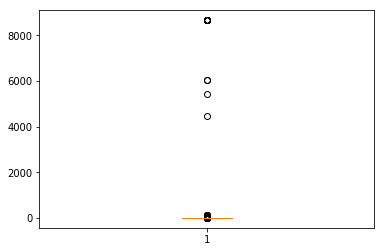

In [83]:
plt.boxplot(train['distance'])

In [84]:
train['distance'].isnull().sum()

0

Here after seeing the first 23 records in the distance variable they have traveled more than 8000 Km,just after 23rd record the distance in KM is drastically reduced to 129, which means these values are showing some outliers We need to remove these values

In [85]:
Counter(train['distance'] == 0)

Counter({False: 15447, True: 454})

In [86]:
Counter(test['distance'] == 0)

Counter({False: 9829, True: 85})

Here we can see that the distance variable has 0 km
we will remove the rows whose distance value is zero

In [87]:
train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(15447, 14)

In [88]:
Counter(train['distance'] == 0)

Counter({False: 15447})

Here we can see that the distance variable has more than 129 km value . we will remove the rows whose distance value is more then 129

In [89]:
#we will remove the rows whose distance values is very high which is more than 129kms
train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(15424, 14)

In [90]:
train[train['distance']> 130]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance


In [91]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
Year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
distance                    float64
dtype: object

Here we already splitted  'pickup_datetime' in to [Year,Month,Date,Hour,Minute] and [pickup_longitude, pickup_latitude,dropoff_longitude,dropoff_latitude] into 'distance', so we will drop that

In [92]:
drop_val = ['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','Minute']
train = train.drop(drop_val, axis = 1)

In [93]:
train.head()

,fare_amount,passenger_count,Year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009,6,15,0,17,1.030764
1,16.9,1.0,2010,1,5,1,16,8.450134
2,5.7,2.0,2011,8,18,3,0,1.389525
3,7.7,1.0,2012,4,21,5,4,2.799270
4,5.3,1.0,2010,3,9,1,7,1.999157


In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15424 entries, 0 to 16065
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fare_amount      15424 non-null  float64
 1   passenger_count  15424 non-null  float64
 2   Year             15424 non-null  int64  
 3   Month            15424 non-null  int64  
 4   Date             15424 non-null  int64  
 5   Day              15424 non-null  int64  
 6   Hour             15424 non-null  int64  
 7   distance         15424 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.1 MB


Here we can see that the dtpe of passenger_count is float, so we will change it to int

In [95]:
train['passenger_count'] = train['passenger_count'].astype('int32')

In [96]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop_test, axis = 1)

In [97]:
test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  9914 non-null   int64  
 1   Year             9914 non-null   int64  
 2   Month            9914 non-null   int64  
 3   Date             9914 non-null   int64  
 4   Day              9914 non-null   int64  
 5   Hour             9914 non-null   int64  
 6   distance         9914 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 542.3 KB


In [99]:
train['passenger_count'].value_counts()

1    10882
2     2260
5     1016
3      655
4      317
6      294
Name: passenger_count, dtype: int64

In [100]:
train.nunique()

fare_amount          449
passenger_count        6
Year                   7
Month                 12
Date                  31
Day                    7
Hour                  24
distance           15424
dtype: int64

# Now we will try to Visualize the data using different techniques of Visualization

# Data Visualization

In [101]:
train.head()

,fare_amount,passenger_count,Year,Month,Date,Day,Hour,distance
0,4.5,1,2009,6,15,0,17,1.030764
1,16.9,1,2010,1,5,1,16,8.450134
2,5.7,2,2011,8,18,3,0,1.389525
3,7.7,1,2012,4,21,5,4,2.799270
4,5.3,1,2010,3,9,1,7,1.999157


Visualizing:

1. Does number of passsenger effect the fare
2. Pickup Time and Day effect fare
3. Day of the week does it effect the fare
4. Distance effects the fare

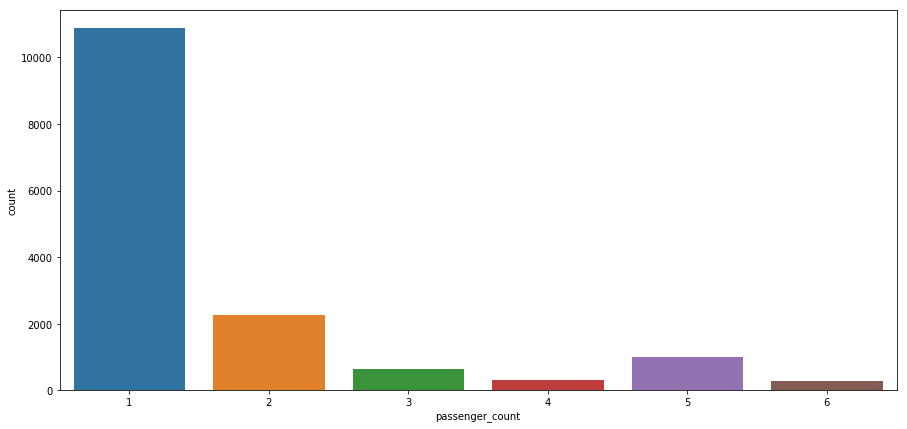

In [102]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x='passenger_count',data = train)


Here we can see that passenger_count of '1' and '2' are more preferred

In [103]:
#sns.pairplot(train)

Text(0.5, 1.0, 'Passenger Count VS Fare Amount Distribution')

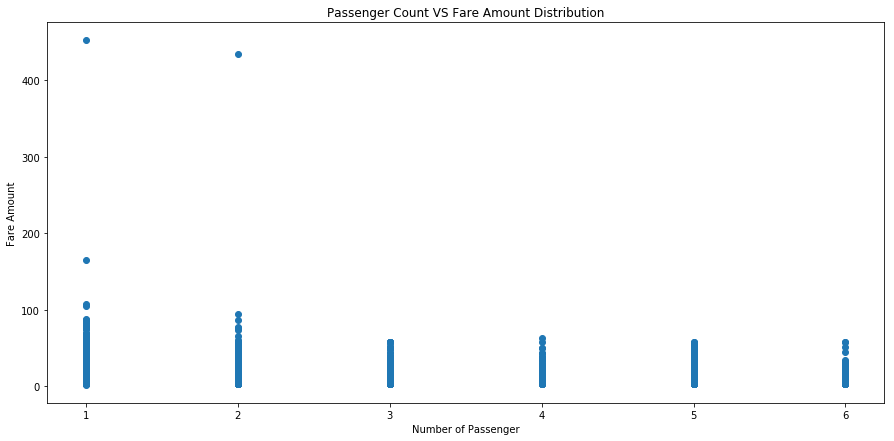

In [104]:
#Relationship beetween number of passengers and Fare
plt.figure(figsize=(15,7))
plt.scatter(x ='passenger_count', y='fare_amount', data = train )
plt.xlabel('Number of Passenger')
plt.ylabel('Fare Amount')
plt.title("Passenger Count VS Fare Amount Distribution")

Here we can see that:
1. Single travelling passenger are more compared to others
2. Aslo we can say that Highest fare amount is for single and double travelling passenger.

Text(0, 0.5, 'Fare')

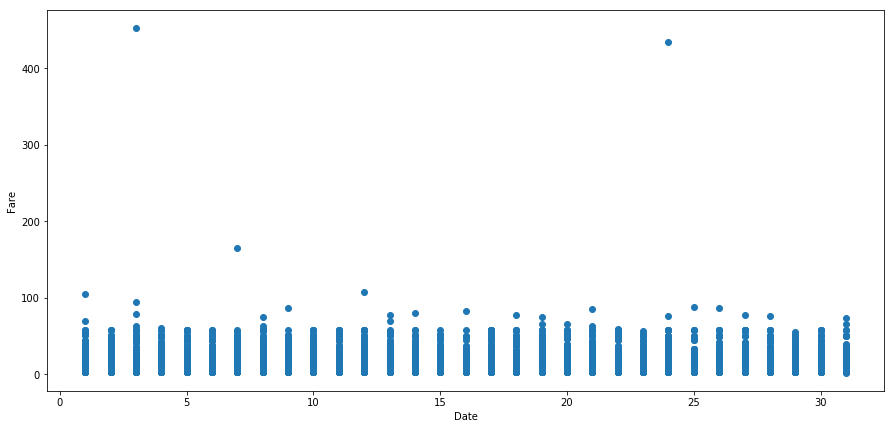

In [105]:
#Relationship beetween Date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x='Date', y ='fare_amount', data = train)
plt.xlabel('Date')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

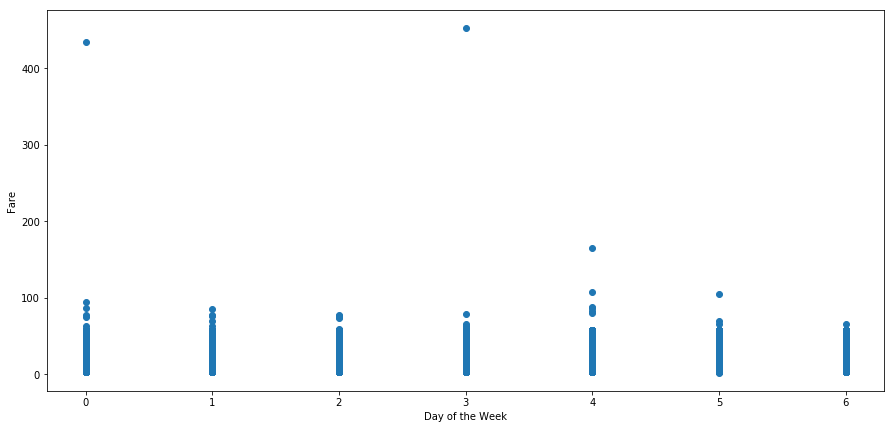

In [106]:
#Relationship beetween Date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x='Day', y='fare_amount', data = train)
plt.xlabel('Day of the Week')
plt.ylabel('Fare')


The highest fares seem to be on a Sunday, Monday and Thursday, and the low on Wednesday and Saturday. May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices

Text(0, 0.5, 'Fare')

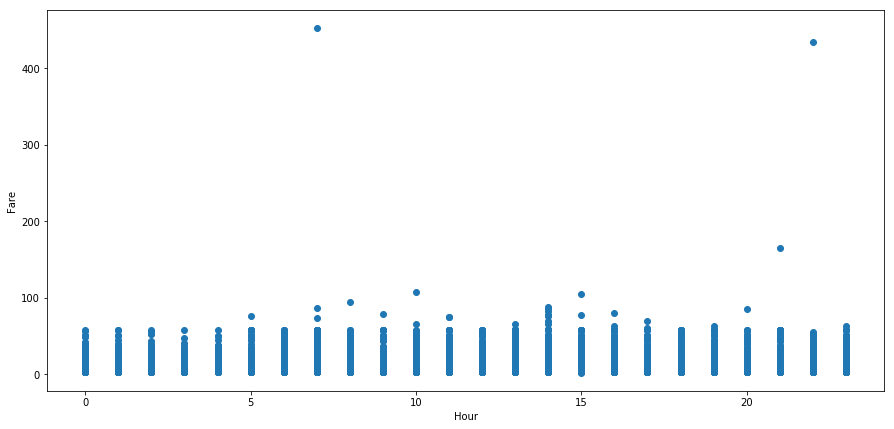

In [107]:
#Relationship beetween Hour and Fare
plt.figure(figsize=(15,7))
plt.scatter(x='Hour', y ='fare_amount', data = train)
plt.xlabel('Hour')
plt.ylabel('Fare')

From the above plot We can observe that the cabs taken at 7 am and 22 Pm are the costliest ride.Hence we can assume that cabs taken early in morning and late at night are costliest

Text(0, 0.5, 'Fare')

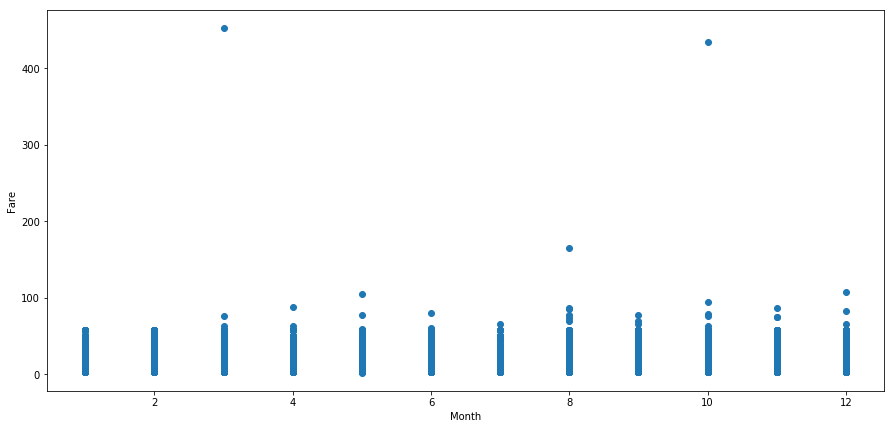

In [108]:
#Relationship beetween Month and Fare
plt.figure(figsize=(15,7))
plt.scatter(x='Month', y ='fare_amount', data = train)
plt.xlabel('Month')
plt.ylabel('Fare')

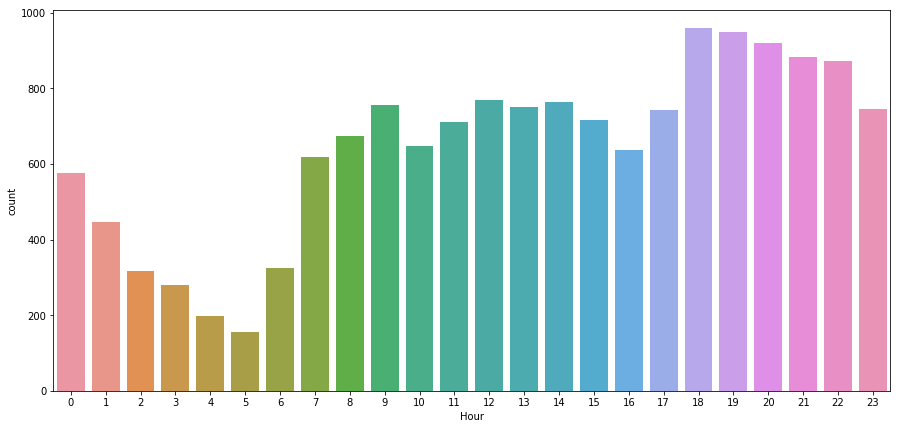

In [109]:
#Relationship beetween Hour and Fare
plt.figure(figsize=(15,7))
sns.countplot(x = 'Hour', data = train)

Here we can see that lowest cab ride are at 5 am and highhest cab ride at 6 pm due to office rush hours

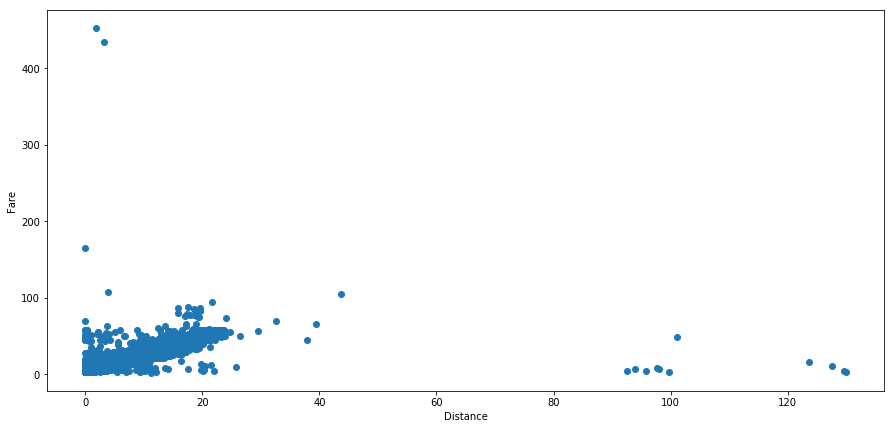

In [110]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x='distance', y='fare_amount', data= train)
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

Here we can see that most of the cab ride are within 50 km range. It is also obvious that distance will effect the Fare.

In [111]:
train.head(5)

,fare_amount,passenger_count,Year,Month,Date,Day,Hour,distance
0,4.5,1,2009,6,15,0,17,1.030764
1,16.9,1,2010,1,5,1,16,8.450134
2,5.7,2,2011,8,18,3,0,1.389525
3,7.7,1,2012,4,21,5,4,2.799270
4,5.3,1,2010,3,9,1,7,1.999157


Now we will do some Feature Scaling on Dataset

# Feature Scaling

fare_amount


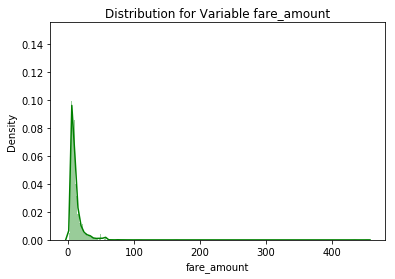

distance


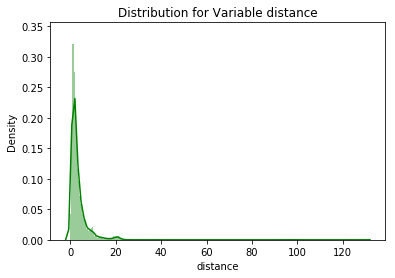

In [112]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [113]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])

In [114]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

fare_amount


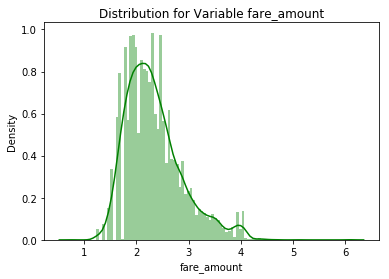

distance


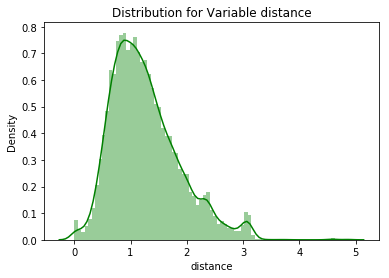

In [115]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

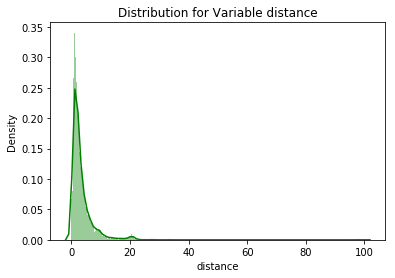

In [116]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [117]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

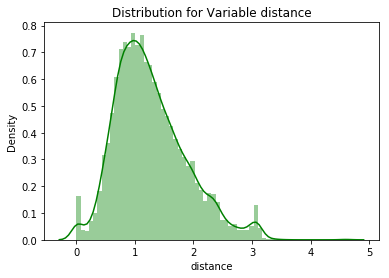

In [118]:
sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

# Applying ML ALgorithms:


In [119]:
#X = pd.DataFrame(train, columns=['passenger_count','Year','Month','Date','Day','Hour','distance']) # features
#X = train.values[:,1:8] # features
#Y = train.values[:,0] # Target

X = train.iloc[:,1:8] ## Feature 

In [120]:
X.head()

,passenger_count,Year,Month,Date,Day,Hour,distance
0,1,2009,6,15,0,17,0.708412
1,1,2010,1,5,1,16,2.246029
2,2,2011,8,18,3,0,0.871095
3,1,2012,4,21,5,4,1.334809
4,1,2010,3,9,1,7,1.098331


In [121]:
Y = train.iloc[:,:1] ##Target 

In [122]:
Y.head()

,fare_amount
0,1.704748
1,2.884801
2,1.902108
3,2.163323
4,1.840550


# Before running any model, we will split our data into two parts which is train and test data. Here in our case we have taken 80% of the data as our train data. 

In [123]:
##train test split for further modelling
from sklearn.model_selection import train_test_split #splitting dataset
X_train, X_test, y_train, y_test = train_test_split( X,Y, test_size = 0.20, random_state = 1)

In [124]:
print(X_train.shape)
print(X_test.shape)

(12339, 7)
(3085, 7)


In [125]:
X_train.head()

,passenger_count,Year,Month,Date,Day,Hour,distance
7689,1,2011,7,15,4,10,1.403839
13018,1,2014,7,11,4,10,0.828231
12950,3,2009,6,27,5,17,0.980620
14009,1,2009,6,12,4,15,0.534072
2815,1,2012,11,26,0,7,0.911806


In [126]:
X_test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance
1949,5,2013,6,27,3,15,3.091828
11386,1,2014,10,10,4,23,1.886420
9920,1,2012,11,13,1,20,2.560544
12161,5,2013,7,7,6,12,0.181758
13578,1,2013,8,15,3,13,1.499759


In [127]:
y_train.head()

,fare_amount
7689,2.406945
13018,2.014903
12950,2.014903
14009,1.629241
2815,2.079442


In [128]:
y_test.head()

,fare_amount
1949,4.066117
11386,3.020425
9920,3.349904
12161,1.504077
13578,2.674149


# Linear Regression Model:

In [129]:
from sklearn.linear_model import LinearRegression #ML algorithm

In [130]:
# Building model on top of training datasetfrom sklearn.linear_model import LinearRegression #ML algorithm
model = LinearRegression().fit(X_train , y_train) 

In [131]:
#prediction on train data
pred_train_LR = model.predict(X_train)

In [132]:
#prediction on test data
pred_test_LR = model.predict(X_test)

In [133]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [134]:
##calculating RMSE for test datafrom sklearn.metrics import mean_squared_error
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [135]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 0.2758647452243595
Root Mean Squared Error For Test data = 0.24286207440988825


In [136]:
#calculate R^2 for train data
r2_score(y_train, pred_train_LR)

0.7480566439279059

In [137]:
r2_score(y_test, pred_test_LR)

0.7887921555089896

# Decision Tree 

In [138]:
from sklearn.tree import DecisionTreeRegressor

In [139]:
fit_DT  = DecisionTreeRegressor(criterion='mse', random_state=100,max_depth=4, min_samples_leaf=1)

In [140]:
fit_DT.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [141]:
pred_train_DT = fit_DT.predict(X_train)

In [142]:
pred_test_DT = fit_DT.predict(X_test)

In [143]:
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

In [144]:
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [145]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.25966827577326895
Root Mean Squared Error For Test data = 0.24049968648893114


In [146]:
r2_score(y_train, pred_train_DT)

0.7767721924333111

In [147]:
r2_score(y_test, pred_test_DT)

0.7928811276096276

# Random Forest

In [148]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
model_RF = RandomForestRegressor(n_estimators= 500).fit(X_train, y_train)

E:\Ana3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [150]:
pred_train_RF = model_RF.predict(X_train)

In [151]:
pred_test_RF = model_RF.predict(X_test)

In [152]:
RMSE_train_RF  = np.sqrt(mean_squared_error(y_train,pred_train_RF))

In [153]:
RMSE_test_RF  = np.sqrt(mean_squared_error(y_test,pred_test_RF))

In [154]:
print("RMSE = ",RMSE_train_RF)
print("RMSE = ", RMSE_test_RF)

RMSE =  0.09598842393202976
RMSE =  0.22985278727555614


In [155]:
r2_score(y_train,pred_train_RF)

0.969496601582486

In [156]:
r2_score(y_test,pred_test_RF)

0.810813478127653

# Summary of Models

# Here we can see that Random Forest Model is perfoming well with RMSE low and R-squared High as compared to other Models

# Applying HyperParameter Modeling/Tuning For Optimized result

# Here we have used two hyper parameters tuning techniques


# 1 Random Search CV 
 

# 2 Grid Search CV

In [157]:
##Random Search CV on Random Forest Model

from sklearn.model_selection import RandomizedSearchCV
RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

Randomcv_RF = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
Randomcv_RF = Randomcv_RF.fit(X_train,y_train)
predictions_RRF = Randomcv_RF.predict(X_test)

view_best_params_RRF = Randomcv_RF.best_params_

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.82.
RMSE =  0.22667922103841728


In [158]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_RF = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_RF = gridcv_RF.fit(X_train,y_train)
view_best_params_GRF = gridcv_RF.best_params_

#Apply model on test data
predictions_GRF = gridcv_RF.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.82.
RMSE =  0.2266642115231103


# Prediction of fare from provided test dataset :

We have already cleaned and processed our test dataset along with our training dataset. Hence we will be predicting using grid search CV for random forest model

In [163]:
## Grid Search CV for random Forest model
regr_RF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_RF = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_RF = gridcv_RF.fit(X_train,y_train)
view_best_params_GRF = gridcv_RF.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_RF.predict(test)

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Ana3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

In [164]:
predictions_GRF_test_Df

array([2.36311313, 2.38922783, 1.7024001 , ..., 4.00774096, 3.27229037,
       2.00126172])

In [165]:
test['Predicted_fare'] = predictions_GRF_test_Df

In [166]:
test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,1.200946,2.363113
1,1,2015,1,27,1,13,1.231205,2.389228
2,1,2011,10,8,5,11,0.481579,1.702400
3,1,2012,12,1,5,21,1.085538,2.187045
4,1,2012,12,1,5,21,1.854312,2.788172


In [167]:
test.to_csv('test1.csv')